# 131 Final Project - Kickstarter Investigation 

## Set Up

In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from collections import Counter
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Lets read and investigate the data

In [2]:
ks = pd.read_csv("kickstarter.csv")
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
ks.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
ks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Long term goal: predict state variable

Prediction Variables: name / category / main_category / currency / deadline / goal / launched / country 

Variables we can make: length_of_campaign / title_score / goal_amount_tier / launch_time_of_day / launch_year / launch_month / launch_day 

Descriptive Variables: pledged / backers / usd pledged / usd_pledged_real / usd_goal_real


## Categoires and their respective counts

In [5]:
count_cats = ks.category.value_counts()
count_cats.head(15) 

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Video Games       11830
Food              11493
Film & Video      10108
Fiction            9169
Fashion            8554
Nonfiction         8318
Art                8253
Apparel            7166
Theater            7057
Technology         6930
Name: category, dtype: int64

People love product design / documentary / and music projects on kickstarters 

In [6]:
count_cats_s = ks.loc[ks["state"] == "successful"].category.value_counts()
(count_cats_s/count_cats).sort_values(ascending=False).head(15)

Chiptune           0.771429
Residencies        0.724638
Anthologies        0.664541
Dance              0.664083
Indie Rock         0.639562
Letterpress        0.632653
Country & Folk     0.631768
Classical Music    0.630310
Theater            0.624203
Performances       0.615992
Jazz               0.596757
Comic Books        0.588407
Plays              0.583454
Typography         0.583333
Tabletop Games     0.554725
Name: category, dtype: float64

Product Design , Tabletop Game, and shorts have good amounts of success. 
A 0.55 success rate for tabletop games! 

In [7]:
(count_cats_s/count_cats).sort_values(ascending=False).tail(10)

Television      0.153695
Couture         0.152727
Action          0.144595
Candles         0.128205
Food Trucks     0.123858
Software        0.121719
Video           0.119159
Web             0.085969
Mobile Games    0.085523
Apps            0.059574
Name: category, dtype: float64

Apps and Mobile Games do terrible on kickstarter 

In [8]:
ks.category.unique() 
ks.category.nunique() #159 unique 

159

In [9]:
ks.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [10]:
ks.main_category.nunique()

15

## main_category counts


In [11]:
ks.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

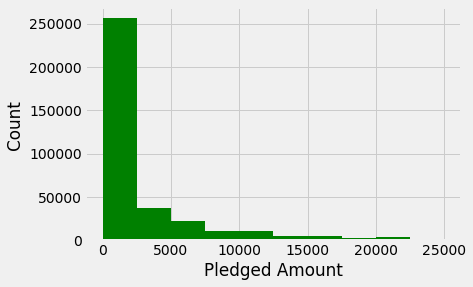

In [12]:
plt.style.use('fivethirtyeight')
plt.hist(ks["usd_pledged_real"], color = "green", range = (0,25000))
plt.xlabel("Pledged Amount")
plt.ylabel('Count ')
plt.show()


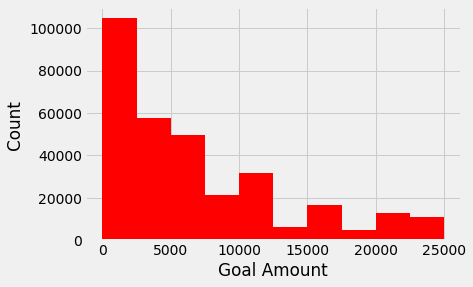

In [13]:
plt.style.use('fivethirtyeight')
plt.hist(ks["usd_goal_real"], color = "red", range = (0,25000))
plt.xlabel("Goal Amount")
plt.ylabel('Count ')
plt.show()


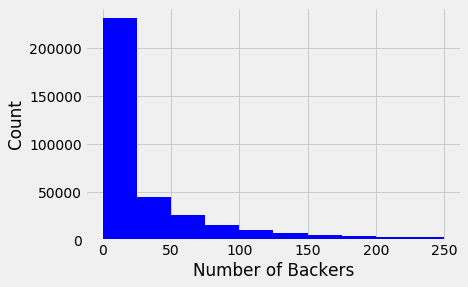

In [43]:
plt.style.use('fivethirtyeight')
plt.hist(ks["backers"], color = "blue", range = (0,250))
plt.xlabel("Number of Backers")
plt.ylabel('Count')
plt.show()


Both pledged, goal, amounts are all skewed to the right. 
We will therefore use Median as our average throughout our analysis.

## Currency investigation


In [15]:
count_currency = ks.currency.value_counts()
count_currency

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

## Categoires and counts for them 


In [16]:
count_country = ks.country.value_counts()
count_country # error in N'O


US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

## US Kickstarters 

In [ ]:
US_ks = ks[ks['country'] == "US"]
US_ks.groupby(["state"])["goal", "pledged","backers"].mean()
# use 'real' variables 
US_ks.groupby(["state"])["usd_goal_real", "usd_pledged_real","backers"].mean()
US_ks.groupby(["state"])["usd_goal_real", "usd_pledged_real","backers"].median()

In [17]:
ks.groupby(["state"])["usd_goal_real", "usd_pledged_real","backers"].median()

,usd_goal_real,usd_pledged_real,backers
state,,,
canceled,10000.000,87.00,3
failed,7500.000,100.00,3
live,6547.090,259.16,5
successful,3837.740,5107.25,71
suspended,5000.000,37.00,2
undefined,3530.425,580.00,0


In [19]:
ks.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [20]:
# Kickstarter Success rate 
ks_state = pd.crosstab(index=ks["state"],  # Make a crosstab
                              columns="count")      # Name the count column
ks_state
ks_state/ks_state.sum()
# Around 52% of kickstartes fail, 37% are successful, 10% are canceled, 
# and about 1% are live right now or suspended for the time being

col_0,count
state,
canceled,0.102411
failed,0.522153
live,0.007392
successful,0.353762
suspended,0.004875
undefined,0.009407


In [21]:
# US Success rate 
ks_state_us = pd.crosstab(index=US_ks["state"],  # Make a crosstab
                              columns="count")      # Name the count column
#ks_state_us
#ks_state_us/ks_state_us.sum()
# In the US, around 52% of kickstartes fail, 37% are successful, 10% are canceled, 
# and about 1% are live right now or suspended for the time being


## Investigations Countries 


In [22]:
country_states = pd.DataFrame(ks.groupby(["country","state"]).state.count())
sum_of_states_per_country = country_states.groupby(["country"]).state.sum()
country_state_rates = pd.DataFrame(country_states.state / sum_of_states_per_country)
country_state_rates = country_state_rates.unstack()
#country_state_rates


In [ ]:
country_state_rates.state.successful.sort_values(ascending=False)

In [23]:
country_state_rates.state.failed.sort_values(ascending=False)
    # failure rates vary from 67% to 40% 
    # why is japan so low ? 

country
IT      0.670605
AT      0.633166
NL      0.625523
LU      0.612903
CH      0.611038
ES      0.606766
BE      0.601297
DE      0.599137
NO      0.593220
AU      0.587575
IE      0.586930
MX      0.579338
NZ      0.570836
SE      0.569152
CA      0.558146
FR      0.548486
US      0.519641
GB      0.516364
DK      0.508535
SG      0.497297
HK      0.422330
JP      0.400000
N,0"    0.027653
Name: failed, dtype: float64

## What type of projects succeed the most / fail the most on kickstarter?

In [24]:
category_states = pd.DataFrame(ks.groupby(["main_category","state"]).state.count())
#category_states

## Percentages of kickstarters that fall into these main_categories 

In [25]:
sum_of_states_per_category = category_states.groupby(["main_category"]).state.sum()
percent_of_kickstarters = (sum_of_states_per_category.sort_values(ascending=False) / len(ks)) * 100
percent_of_kickstarters


main_category
Film & Video    16.792065
Music           13.710945
Publishing      10.530263
Games            9.304101
Technology       8.601097
Design           7.941140
Art              7.434882
Food             6.497104
Fashion          6.025442
Theater          2.881997
Comics           2.857173
Photography      2.846610
Crafts           2.326355
Journalism       1.255741
Dance            0.995085
Name: state, dtype: float64

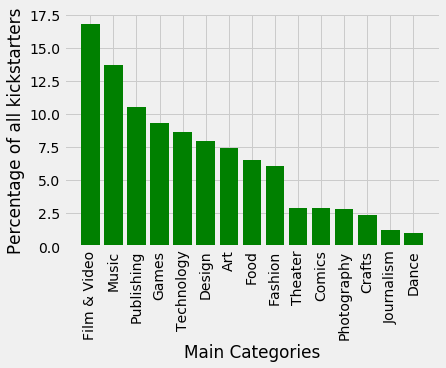

In [26]:
plt.style.use('fivethirtyeight')
plt.bar(percent_of_kickstarters.index, percent_of_kickstarters, color = "green")
plt.xticks(rotation=90)
plt.xlabel("Main Categories")
plt.ylabel('Percentage of all kickstarters')
plt.show()

## Overall demographics for projects

In [27]:
category_state_rates = pd.DataFrame(category_states.state / sum_of_states_per_category)
category_state_rates = category_state_rates.unstack()
category_state_rates 

state                                                   
state          canceled    failed      live successful suspended undefined
main_category                                                             
Art            0.078926  0.501936  0.006891   0.408837  0.003410       NaN
Comics         0.077826  0.373047  0.007025   0.539976  0.002126       NaN
Crafts         0.095698  0.647406  0.008628   0.240095  0.008173       NaN
Dance          0.043259  0.327760  0.004777   0.620488  0.003450  0.000265
Design         0.138078  0.492650  0.010143   0.350848  0.008214  0.000067
Fashion        0.116147  0.621581  0.010957   0.245135  0.006048  0.000131
Film & Video   0.090509  0.517481  0.005221   0.371518  0.001840  0.013431
Food           0.089871  0.649094  0.007479   0.247338  0.006219       NaN
Games          0.176038  0.454231  0.008146   0.355312  0.006245  0.000028
Journalism     0.109989  0.659727  0.006519   0.212829  0.010936       NaN
Music          0.063658  0.418968  0.005412   0.466062  0.002870  0.043029
Photography    0.091474  0.592263  0.004453   0.306615  0.005103  0.000093
Publishing     0.090335  0.580453  0.007499   0.308472  0.001655  0.011586
Technology     0.144770  0.632995  0.011575   0.197550  0.013019  0.000092
Theater        0.055713  0.339778  0.003757   0.598735  0.001924  0.000092

In [28]:
cat_s_rate = category_state_rates.state.successful.sort_values(ascending=False)
cat_s_rate 

main_category
Dance           0.620488
Theater         0.598735
Comics          0.539976
Music           0.466062
Art             0.408837
Film & Video    0.371518
Games           0.355312
Design          0.350848
Publishing      0.308472
Photography     0.306615
Food            0.247338
Fashion         0.245135
Crafts          0.240095
Journalism      0.212829
Technology      0.197550
Name: successful, dtype: float64

Dance, theater, and comics often do well (> 50% chance of success).
Tech, Journalism, and Crafts don't do well at all (20% success), however, part of this is due to the sizes of these categories.

In [29]:
num_successful_proj_per_cat = ((category_state_rates.state.successful) * (sum_of_states_per_category)).sort_values(ascending=False)
num_successful_proj_per_cat


main_category
Music           24197.0
Film & Video    23623.0
Games           12518.0
Publishing      12300.0
Art             11510.0
Design          10550.0
Theater          6534.0
Technology       6434.0
Food             6085.0
Comics           5842.0
Fashion          5593.0
Photography      3305.0
Dance            2338.0
Crafts           2115.0
Journalism       1012.0
dtype: float64

As a proportion of all kickstarters in their category, Music, Film & Video, and Games still hold out strong. 
Categories, Music, Film & Video, Games, and Publishing do the best when fixed for the volume of their category. 


In [30]:
category_state_rates.state.failed.sort_values(ascending=False)
    
    

main_category
Journalism      0.659727
Food            0.649094
Crafts          0.647406
Technology      0.632995
Fashion         0.621581
Photography     0.592263
Publishing      0.580453
Film & Video    0.517481
Art             0.501936
Design          0.492650
Games           0.454231
Music           0.418968
Comics          0.373047
Theater         0.339778
Dance           0.327760
Name: failed, dtype: float64

Journalism , Food, and Crafts don't do well

Film & Video , music, publishing, and games and tech are popular and more succesptible to high failure rates 

In [31]:
total_projects_per_cat = sum_of_states_per_category.sort_values(ascending=False)
total_projects_per_cat

main_category
Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: state, dtype: int64

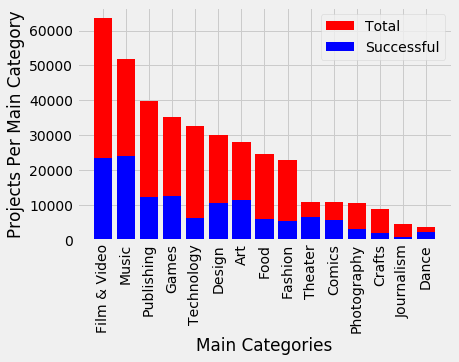

In [32]:
plt.style.use('fivethirtyeight')
plt.bar(total_projects_per_cat.index, total_projects_per_cat, color = "red")
plt.bar(num_successful_proj_per_cat.index, num_successful_proj_per_cat, color = "blue")
plt.xticks(rotation=90)
plt.xlabel("Main Categories")
plt.ylabel('Projects Per Main Category')
plt.legend(('Total', 'Successful'))
plt.show()

## Main Category Median Goals 

In [34]:
cat_goal_medians = ks.groupby(['main_category']).usd_goal_real.median().sort_values(ascending=False)
cat_goal_medians

main_category
Technology      20000.00
Food            10000.00
Design          10000.00
Games            8000.00
Film & Video     6597.87
Fashion          5938.52
Publishing       5000.00
Journalism       5000.00
Photography      4000.00
Music            4000.00
Comics           3500.00
Theater          3300.00
Dance            3300.00
Art              3000.00
Crafts           2345.00
Name: usd_goal_real, dtype: float64

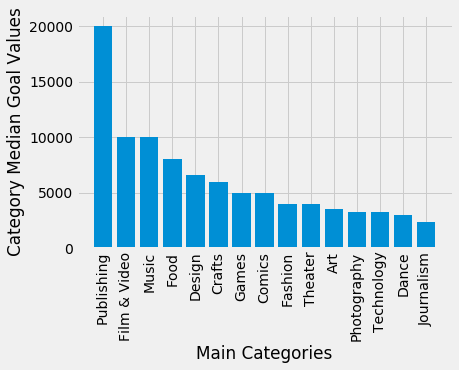

In [46]:
plt.style.use('fivethirtyeight')
main_category = ks.main_category.unique()
plt.bar(main_category, cat_goal_medians)
plt.xticks(rotation=90)
plt.xlabel("Main Categories")
plt.ylabel('Category Median Goal Values')
plt.show()

## Sub categories per main_category 

In [35]:
ks.groupby(["main_category"]).category.unique()

main_category
Art             [Public Art, Illustration, Art, Painting, Perf...
Comics          [Comic Books, Comics, Anthologies, Graphic Nov...
Crafts          [Crafts, DIY, Weaving, Stationery, Knitting, E...
Dance           [Dance, Performances, Spaces, Workshops, Resid...
Design          [Product Design, Design, Architecture, Graphic...
Fashion         [Fashion, Childrenswear, Accessories, Ready-to...
Film & Video    [Narrative Film, Film & Video, Documentary, We...
Food            [Restaurants, Food, Drinks, Food Trucks, Cookb...
Games           [Games, Tabletop Games, Video Games, Mobile Ga...
Journalism          [Audio, Print, Journalism, Video, Web, Photo]
Music           [Music, Indie Rock, Pop, Rock, Jazz, Electroni...
Photography     [Photography, People, Photobooks, Fine Art, An...
Publishing      [Poetry, Nonfiction, Art Books, Fiction, Publi...
Technology      [Hardware, Software, Gadgets, Web, Apps, Techn...
Theater         [Theater, Festivals, Experimental, Plays, Musi

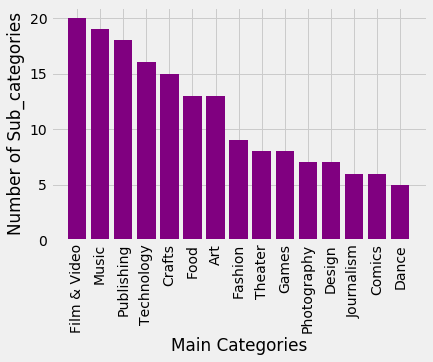

In [36]:
num_sub_cats = ks.groupby(["main_category"]).category.nunique().sort_values(ascending=False)
plt.style.use('fivethirtyeight')
plt.bar(num_sub_cats.index, num_sub_cats, color = "purple")
plt.xticks(rotation=90)
plt.xlabel("Main Categories")
plt.ylabel('Number of Sub_categories')
plt.show()


## What sort of funding scheme makes for a successful kickstarter 
### (small amounts from many or large amounts from a few)
   

In [38]:
ks["average_backed_amount"] = (ks.usd_pledged_real / ks.backers)
ks["average_backed_amount"].fillna(0,inplace=True)
ks["pledge_goal_diff"] = (ks.usd_pledged_real - ks.usd_goal_real) # by how much are failing kickstarters missing their goals 
ks.groupby(["state"])["usd_goal_real", "usd_pledged_real","backers","average_backed_amount","pledge_goal_diff"].median()


,usd_goal_real,usd_pledged_real,backers,average_backed_amount,pledge_goal_diff
state,,,,,
canceled,10000.000,87.00,3,25.000000,-9051.000
failed,7500.000,100.00,3,25.000000,-6435.560
live,6547.090,259.16,5,32.859545,-4295.540
successful,3837.740,5107.25,71,63.347307,545.845
suspended,5000.000,37.00,2,15.116429,-2934.455
undefined,3530.425,580.00,0,inf,-1223.490


Successful kickstarters have many backers, smaller goals than failed projects by over $3500, and usually are good enough to go over their goal, typically because of demand for the product. Canceled and suspended projects have high goals that get no traction and can't continue, and failed projects are similar to canceled projects but have smaller goals and slightly more pledged.


In [39]:
ks["success"] = np.where(ks['state'] == 'successful', True, False)
success = pd.to_numeric(ks["success"])
num_backers = pd.to_numeric(ks['backers'])

backers_corr = np.corrcoef(num_backers, success)
backers_corr # not the best predictor of success but still decent 



array([[1.        , 0.12910883],
       [0.12910883, 1.        ]])

Having more backers obviously makes for a better kickstarter, out data conclueds 
